<a href="https://colab.research.google.com/github/SondosAbdelhamid/customers_EDA/blob/main/customers_EDA_Notebook(Python_For_AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data


In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning


## Handling missing values
We can check for null values using .isnull() and fill them in using .fillna()

In [ ]:
df.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Removing duplicates
We can use .drop_duplicates()

In [ ]:
df.duplicated().sum()

0

## Quick View for the the data
We can use .describe() and .info()

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df.info()
df['Dt_Customer']= 2024 - df['Dt_Customer'].dt.year
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,10,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,11,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,10,94,173,...,5,0,0,0,0,0,0,3,11,0


## Converting data types
Using .astype()

In [ ]:
df['Dt_Customer'] = df['Dt_Customer'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [ ]:
df['Education']= df['Education'].astype('category')
df['Marital_Status']= df['Marital_Status'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   category
 3   Marital_Status       2240 non-null   category
 4   Income               2240 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   int64   
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

In [ ]:
df['Education']=df['Education'].map({'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4})
df['Marital_Status']=df['Marital_Status'].map({'Married': 0, 'Together': 1, 'Single': 2, 'Divorced': 3, 'Widow': 4 , 'Alone':5 , 'Absurd': 6 , 'YOLO': 7})

In [ ]:
df['Education']=df['Education'].astype('int64')
df['Marital_Status']=df['Marital_Status'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   int64  
 3   Marital_Status       2240 non-null   int64  
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   int64  
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Check for outliers
You can use box plots, histograms, and z-scores to find outliers.

In [ ]:

# Z-scores (assuming you want to check for values beyond 3 standard deviations)
z_scores = (df['Income'] - df['Income'].mean()) / df['Income'].std()
outliers = df['Income'][abs(z_scores) > 3]

# Print outliers (optional)
print("Potential outliers:", outliers.tolist())
print(df['Income'].min())
print(df['Income'].max())
print(df['Income'].mean())


Potential outliers: [157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]
1730.0
666666.0
52247.25135379061


In [ ]:
# Z-scores (assuming you want to check for values beyond 3 standard deviations)
z_scores = (df['Year_Birth'] - df['Year_Birth'].mean()) / df['Year_Birth'].std()
outliers = df['Year_Birth'][abs(z_scores) > 3]

# Print outliers (optional)
print("Potential outliers:", outliers.tolist())
print(df['Year_Birth'].min())
print(df['Year_Birth'].max())
print(df['Year_Birth'].mean())

Potential outliers: [1900, 1893, 1899]
1893
1996
1968.8058035714287


In [ ]:
threshold = 3

outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
df.loc[outlier_indices, 'Year_Birth'] = df['Year_Birth'].median()

# Verify that outliers have been handled
print(df['Year_Birth'].describe())

count    2240.000000
mean     1968.903125
std        11.694144
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64


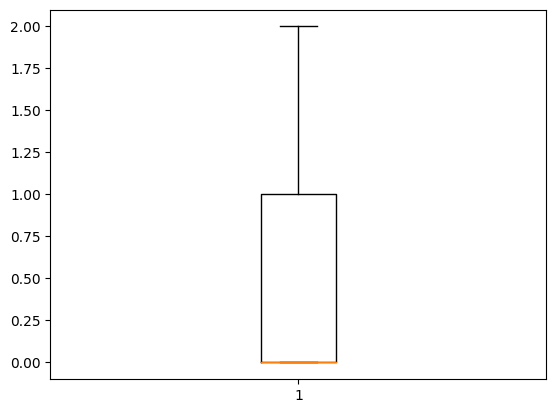

0
2
0.44419642857142855
Potential outliers: []


In [ ]:
plt.boxplot(df['Kidhome'])  # Box plot
plt.show()

# Z-scores (assuming you want to check for values beyond 3 standard deviations)
z_scores = (df['Kidhome'] - df['Kidhome'].mean()) / df['Kidhome'].std()
outliers = df['Kidhome'][abs(z_scores) > 3]

print(df['Kidhome'].min())
print(df['Kidhome'].max())
print(df['Kidhome'].mean())
print("Potential outliers:", outliers.tolist())



In [ ]:
threshold = 3

outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
df.loc[outlier_indices, 'Income'] = df['Income'].mean()

# Verify that outliers have been handled
print(df['Income'].describe())



count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64


# Data Preprocessing


## Dropping unnecessary columns
 Use .drop() in pandas.

In [ ]:
df = df.drop(['ID'], axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,2,58138.0,0,0,12,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,2,46344.0,1,1,10,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,1,71613.0,0,0,11,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,1,26646.0,1,0,10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,0,58293.0,1,0,10,94,173,43,...,5,0,0,0,0,0,0,3,11,0


# Data Visualization


##Histograms
Use .hist() in pandas to get a visual representation of the distribution of a numeric variable. This can reveal outliers, skewness, and other patterns.

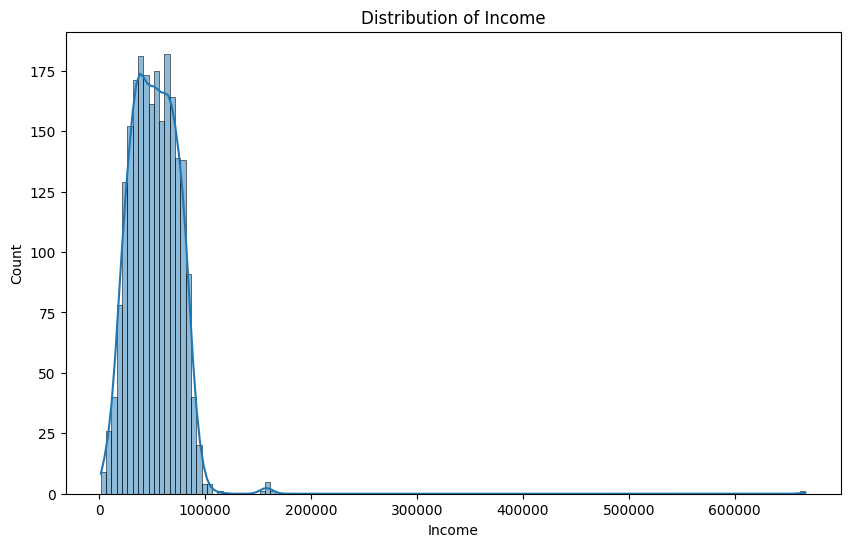

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

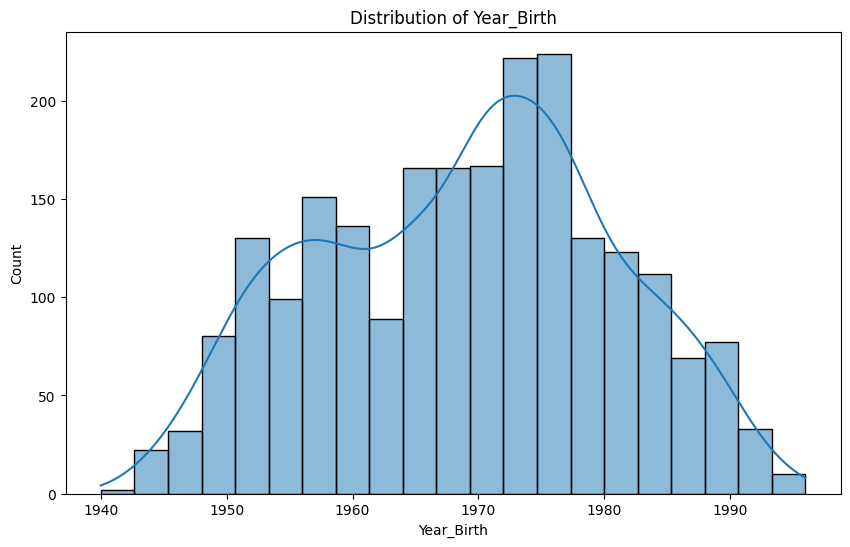

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year_Birth'], kde=True)
plt.title('Distribution of Year_Birth')
plt.xlabel('Year_Birth')
plt.ylabel('Count')
plt.show()

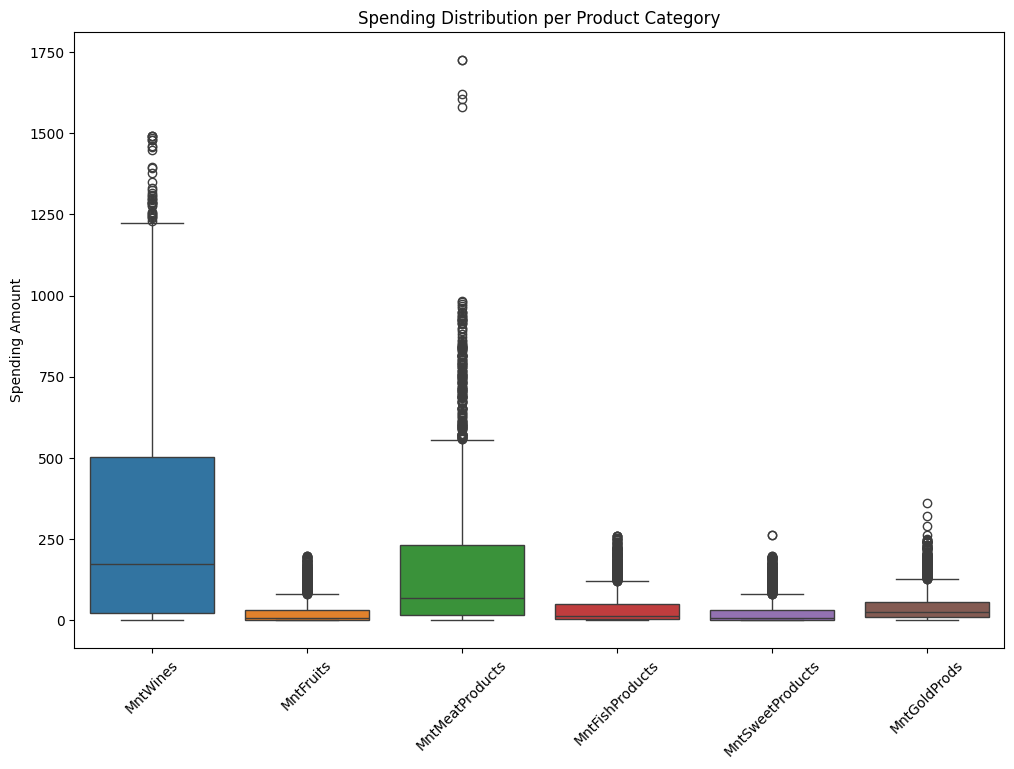

In [ ]:
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_df = df[spending_cols]

plt.figure(figsize=(12, 8))
sns.boxplot(data=spending_df)
plt.title('Spending Distribution per Product Category')
plt.ylabel('Spending Amount')
plt.xticks(rotation=45)
plt.show()

## Scatter plots
Use .plot(kind=’scatter’) to visualize the relationship between two numeric variables. This can reveal correlations, clusters, and outliers.

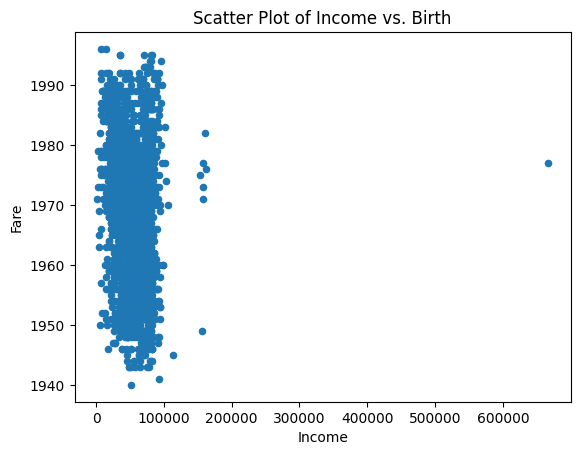

In [ ]:
df.plot(kind='scatter', x='Income', y='Year_Birth')
plt.xlabel('Income')
plt.ylabel('Fare')
plt.title('Scatter Plot of Income vs. Birth')
plt.show()


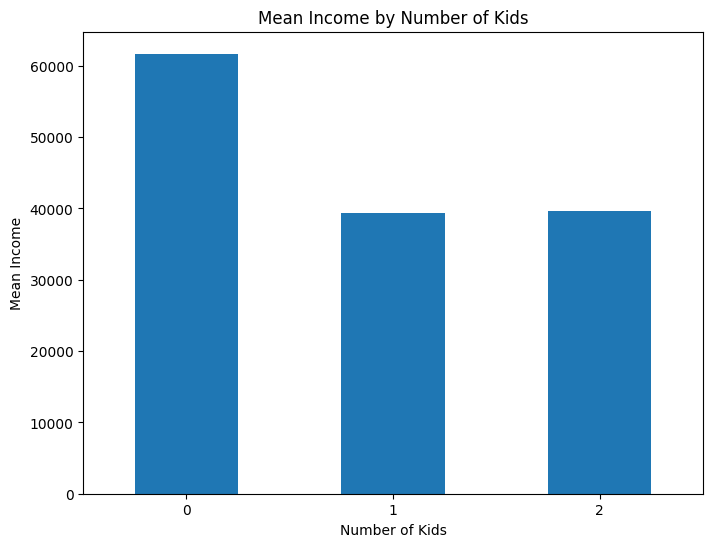

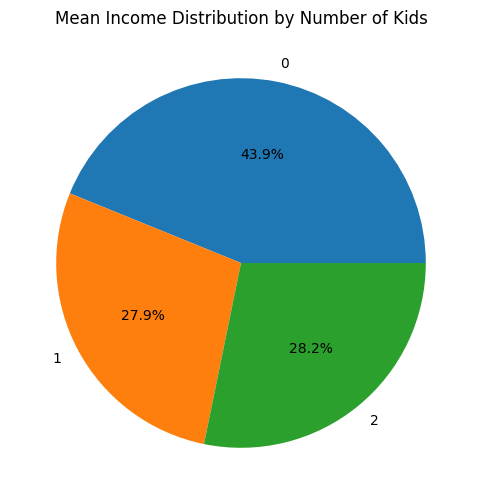

In [ ]:
# prompt: show the relation with Income mean and number of kids bar and pie

# Calculate mean income for each number of kids
mean_income_by_kids = df.groupby('Kidhome')['Income'].mean()

# Bar plot
plt.figure(figsize=(8, 6))
mean_income_by_kids.plot(kind='bar')
plt.title('Mean Income by Number of Kids')
plt.xlabel('Number of Kids')
plt.ylabel('Mean Income')
plt.xticks(rotation=0)
plt.show()

# Pie chart
plt.figure(figsize=(8, 6))
mean_income_by_kids.plot(kind='pie', autopct='%1.1f%%')
plt.title('Mean Income Distribution by Number of Kids')
plt.ylabel('')  # Hide the 'None' label
plt.show()


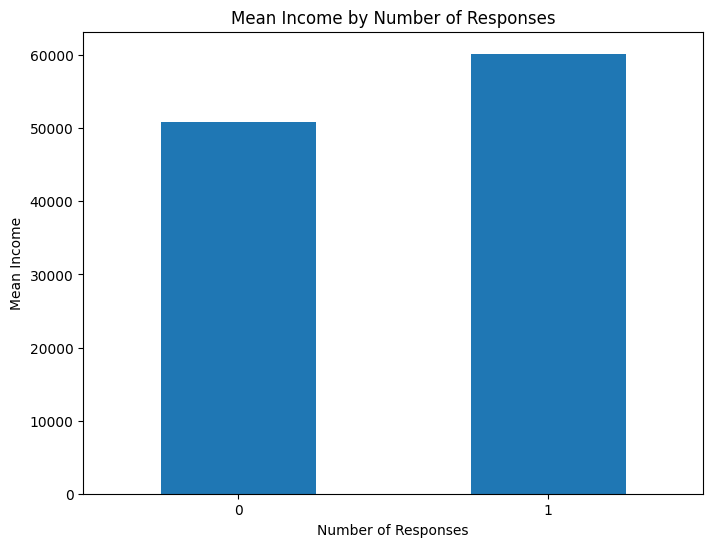

In [ ]:
# the relation with Income mean and number of responses

mean_income_by_kids = df.groupby('Response')['Income'].mean()

# Bar plot
plt.figure(figsize=(8, 6))
mean_income_by_kids.plot(kind='bar')
plt.title('Mean Income by Number of Responses')
plt.xlabel('Number of Responses')
plt.ylabel('Mean Income')
plt.xticks(rotation=0)
plt.show()

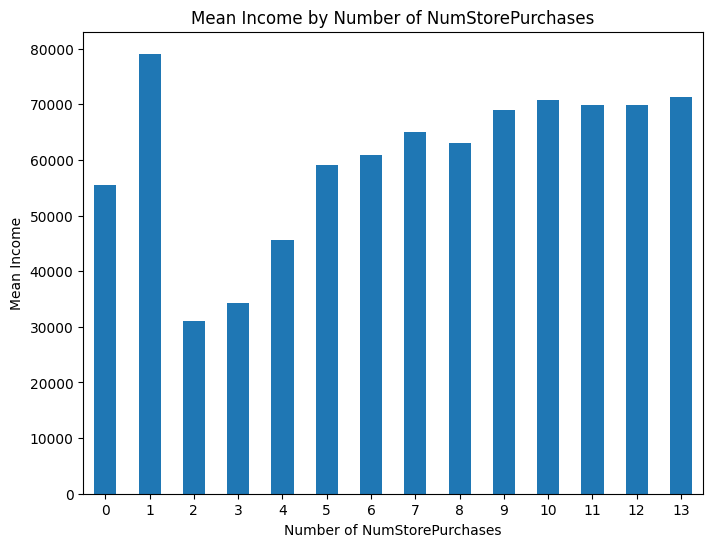

In [ ]:
# the relation with Income mean and number of NumStorePurchases

mean_income_by_kids = df.groupby('NumStorePurchases')['Income'].mean()

# Bar plot
plt.figure(figsize=(8, 6))
mean_income_by_kids.plot(kind='bar')
plt.title('Mean Income by Number of NumStorePurchases')
plt.xlabel('Number of NumStorePurchases')
plt.ylabel('Mean Income')
plt.xticks(rotation=0)
plt.show()

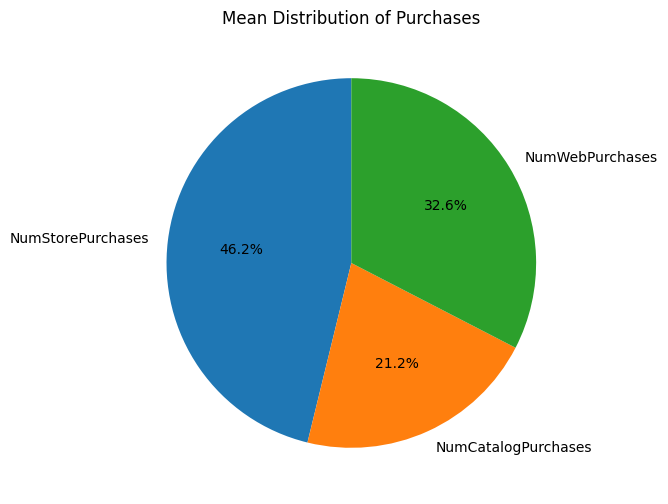

In [ ]:
#relationship with mean of  NumStorePurchases , NumCatalogPurchases and NumStorePurchases pie chart

mean_NumStorePurchases = df['NumStorePurchases'].mean()
mean_NumCatalogPurchases = df['NumCatalogPurchases'].mean()
mean_NumWebPurchases = df['NumWebPurchases'].mean()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie([mean_NumStorePurchases, mean_NumCatalogPurchases, mean_NumWebPurchases],
        labels=['NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases'],
        autopct='%1.1f%%', startangle=90)
plt.title('Mean Distribution of Purchases')
plt.show()


## Modelling


In [ ]:


from sklearn.cluster import KMeans


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [ ]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,2,58138.0,0,0,12,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,2,46344.0,1,1,10,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,1,71613.0,0,0,11,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,1,26646.0,1,0,10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,0,58293.0,1,0,10,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# prompt: split data for k-means to train and test

# Assuming 'df' is your DataFrame and you want to cluster based on 'Income' and 'Year_Birth'
X = df

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

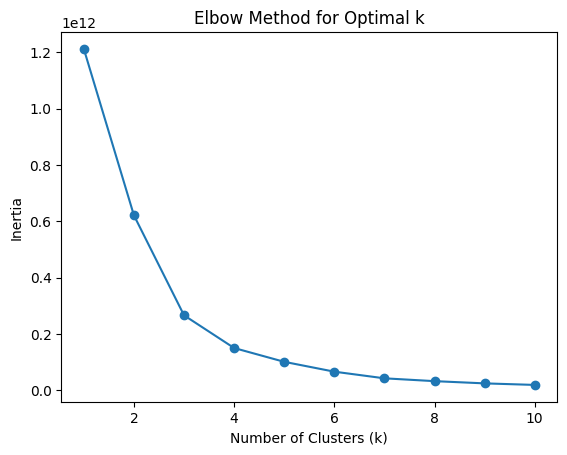

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# prompt: k-means for this data

# Assuming 'df' is your DataFrame with relevant features

# Determine optimal number of clusters (Elbow Method)
inertia = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X_train)
  inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose optimal k based on the elbow plot (let's say k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
predicted = kmeans.fit_predict(X_test)




In [ ]:
model= KMeans(n_clusters=3, random_state=42)
model.fit(X_train)
from sklearn.metrics import silhouette_score
predicted = model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df.columns


In [ ]:
# prompt: save the model

import pickle

# Save the trained KMeans model to a file
filename = 'kmeans_model.pkl'
pickle.dump(model, open(filename, 'wb'))


In [ ]:
pip install gradio

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━

In [ ]:


import gradio as gr

# Load the saved KMeans model
filename = 'kmeans_model.pkl'
loaded_kmeans = pickle.load(open(filename, 'rb'))

def predict_cluster(Year_Birth, Education, Marital_Status, Income, Kidhome,
       Teenhome, Dt_Customer, Recency, MntWines, MntFruits,
       MntMeatProducts, MntFishProducts, MntSweetProducts,
       MntGoldProds, NumDealsPurchases, NumWebPurchases,
       NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth,
       AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1,
       AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response):
  input_data = np.array([[Year_Birth, Education, Marital_Status, Income, Kidhome,
       Teenhome, Dt_Customer, Recency, MntWines, MntFruits,
       MntMeatProducts, MntFishProducts, MntSweetProducts,
       MntGoldProds, NumDealsPurchases, NumWebPurchases,
       NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth,
       AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1,
       AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]])
  cluster = loaded_kmeans.predict(input_data)[0]
  return f"Predicted Cluster: {cluster}"

# Create Gradio interface
inputs = [
    gr.Number(label="Income"),
    gr.Number(label="Recency"),
    gr.Number(label="Year_Birth"),
    gr.Dropdown(list(df['Education'].unique()), label="Education"),
    gr.Dropdown(list(df['Marital_Status'].unique()), label="Marital_Status"),
    gr.Number(label="Kidhome"),
    gr.Number(label="Teenhome"),
    gr.Number(label="Dt_Customer"),
    gr.Number(label="MntWines"),
    gr.Number(label="MntFruits"),
    gr.Number(label="MntMeatProducts"),
    gr.Number(label="MntFishProducts"),
    gr.Number(label="MntSweetProducts"),
    gr.Number(label="MntGoldProds"),
    gr.Number(label="NumDealsPurchases"),
    gr.Number(label="NumWebPurchases"),
    gr.Number(label="NumCatalogPurchases"),
    gr.Number(label="NumStorePurchases"),
    gr.Number(label="NumWebVisitsMonth"),
    gr.Dropdown(list(df['AcceptedCmp3'].unique()), label="AcceptedCmp3"),
    gr.Dropdown(list(df['AcceptedCmp4'].unique()), label="AcceptedCmp4"),
    gr.Dropdown(list(df['AcceptedCmp5'].unique()), label="AcceptedCmp5"),
    gr.Dropdown(list(df['AcceptedCmp1'].unique()), label="AcceptedCmp1"),
    gr.Dropdown(list(df['AcceptedCmp2'].unique()), label="AcceptedCmp2"),
    gr.Dropdown(list(df['Complain'].unique()), label="Complain"),
    gr.Dropdown(list(df['Response'].unique()), label="Response"),

    gr.Number(label="Z_CostContact"),
    gr.Number(label="Z_Revenue")

]
output = gr.Textbox(label="Predicted Cluster")

gr_interface = gr.Interface(fn=predict_cluster, inputs=inputs, outputs=output)
gr_interface.launch(debug=True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://d012ba176f2816b1db.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,2,58138.0,0,0,12,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,2,2,46344.0,1,1,10,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,2,1,71613.0,0,0,11,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,2,1,26646.0,1,0,10,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,4,0,58293.0,1,0,10,94,173,43,...,5,0,0,0,0,0,0,3,11,0
